<a href="https://colab.research.google.com/github/Novita20/PCVK_GANJIL_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install beberapa library pendukung

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from numpy.ma.extras import average

In [ ]:
pip install opencv-python

1. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna.

Mengubah tingkat  kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


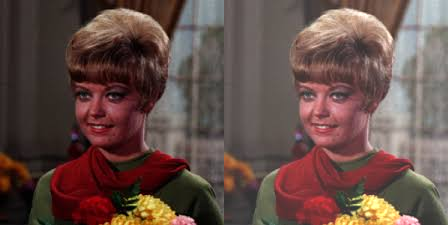

In [ ]:
print('Mengubah tingkat  kecerahan citra')
print('---------------------------------')

# tempat input nilai kecerahan dengan memasukkan angka kemudian disimpan
# pada variabel brightness dan dikonversika ke bilangan bulat melalui fungsi input
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
# blok except berjalan jika inputan tidak sesuai dalam arti bukan angka
# maka kode except akan dijalankan
except ValueError:
  print('Error, not a number')

# digunakan untuk membaca file gambar
original=cv.imread('/content/drive/MyDrive/PCVK/Images/pp.png')
# berfungsi untuk membuat file duplikat dari gambar awal
# akan tetapi diisi dengan nol atau hitam (np.zeros)
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
# perulangan dilakukan untuk tinggi gambar 0-max tinggi gambar
for y in range(original.shape[0]):
  #  perulangan dilakukan untuk lebar gambar 0-max lebar gambar
  for x in range(original.shape[1]):
    # perulangan dilakukan untuk semua channel yang ada
    for c in range(original.shape[2]):
      # kode ini digunakan untuk mengubah kecerahan seluruh bagian pixel gambar
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)
# cv.convertScaleAbs(): Ini adalah fungsi dalam library OpenCV
# yang digunakan untuk mengubah tingkat kecerahan gambar.

# berfungsi untuk menggabungkan hasil gambar original dan gambar yang sudah di ubah kecerahannya
# kemudian akan ditampilkan
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Menggunakan cara cepat dengan fungsi cv.convertScaleAbs dan loop secara bersamaan

Penjelasan : kode tsb digunakan untuk mengubah kecerahan pada gambar, dimana terdapat 2 cara yaitu menggunakan looping dan menggunakan fungsi cv.convertScaleAbs yang lebih cepat dalam perubahan kecerahan pada pixel gambar, sehingga bisa dilihat perbedaan dari perubahan tingkat kecerahan yang ditampilkan dan warna pada gambar asli dengan gambar setalah ditransformasi.

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Menginverse citra
---------------------------------


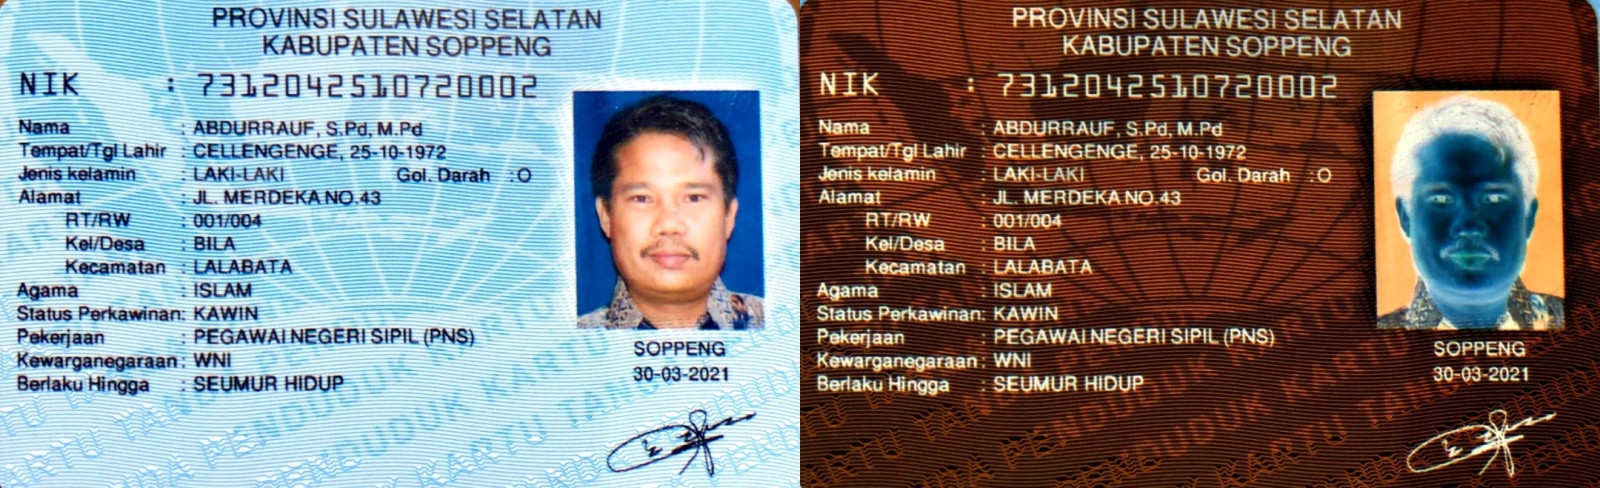

In [6]:
print('Menginverse citra')
print('---------------------------------')

# membaca file gambar
original=cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# mengcopy gambar original
citra_negative = np.copy(original)

# digunakan untuk menghasilkan gambar dengan warna negatif
citra_negative = 255 - citra_negative

# menampilkan gambar original dan yang telah di ubah ke citra negatif
final_frame = cv.hconcat((original, citra_negative))
cv2_imshow(final_frame)


Penjelasan : Mengimplementasikan inverse citra pada KTP. Inverse citra ini digunakan untuk membalikan nilai citra dengan cermin nilai pixel tengah. Proses implementasi ini menggunakan rumus: 255-(citra negative)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

Mengganti kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


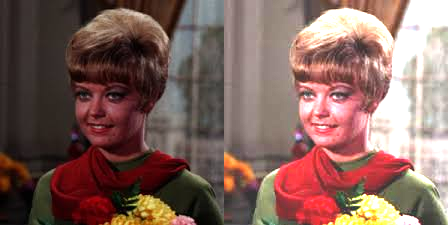

In [ ]:
import cv2
print('Mengganti kontras dan tingkat kecerahan citra')
print('---------------------------------')

# try dan except untuk menampung nilai tingkat kecerahan dan kontras yang diinginkan
# serta menampilkan pesan eror jika nilai yang di input tidak sesuai
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
    contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

# membaca file gambar original
original = cv2.imread('/content/drive/MyDrive/PCVK/Images/pp.png')

# mengecek apakah gambar original telah terbaca dan tidak kosong
if original is not None:
  # mengatur kontras gambar dan kecerahan dengan gambar original sebelumnya
  contrast_image = cv2.convertScaleAbs(original, alpha=contrast, beta=brightness)
  # kemudian gambar yang telah di ubah keceran dan kontrasnya akan ditampilkan
  final_frame = cv2.hconcat((original, contrast_image))
cv2_imshow(final_frame)


Penjelasan : Pada kode diatas digunakan untuk Merubah gambar dengan trasnformasi original kontras menjadi gambar dengan tingkat kecerahan citra.Kemudian kedua gambar ditampilkan dan terlihat perbedaanya.

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


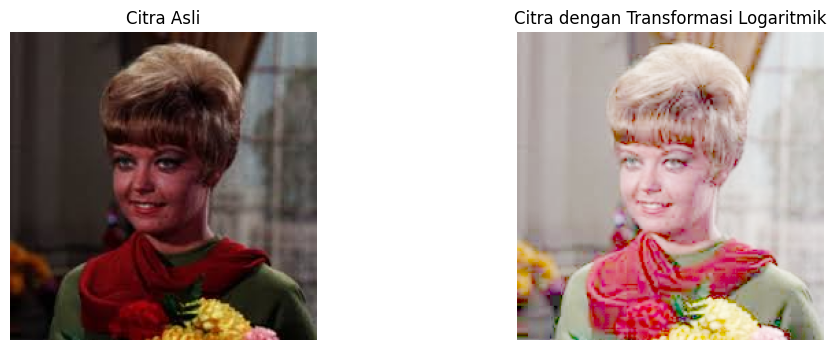

In [ ]:
import cv2

print('mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

# memasukkan nilai kecerahan dan penggunaan fungsi except
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    exit()

# pembacaan file gambar
original = cv2.imread('/content/drive/MyDrive/PCVK/Images/pp.png')

# memproses kontras gambar
c = 255 / np.log(1 + np.max(original))
log_transformed = c * (np.log(original.astype(np.float32) + 1))
log_transformed = np.uint8(np.round(log_transformed))

# meningkatkan kecerahan pada gambar secara keseluruhan dengan tingkat kecerahan
# yang telah ditentukan pada variabel brightness (input)
brightened_image = cv.add(log_transformed, brightness)

# membuat plot gambar pada subplot
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Citra dengan Transformasi Logaritmik')
plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))
plt.axis('off')

# menampilkan hasil gambar
plt.show()

Penjelasan : Kode diatas mentranformasi gambar original menjadi logarthmic brigthness yang digunakan untuk meningkatkan kecerahan pada gambar secara keseluruhan dengan tingkat kecerahan  yang telah ditentukan pada variabel brightness (nilai yang diinputkan).

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

**A. Average**

Transformasi Grayscale - Metode Averaging
---------------------------------


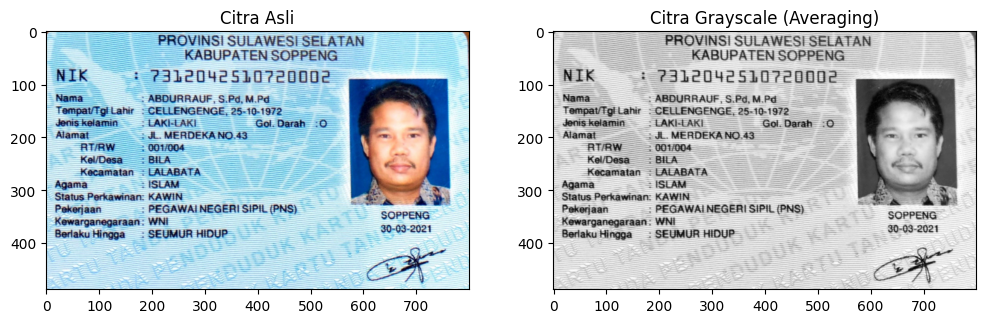

In [ ]:
print('Transformasi Grayscale - Metode Averaging')
print('---------------------------------')

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Ubah citra menjadi citra grayscale dengan metode averaging
grayscale_image = np.mean(original, axis=2)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Averaging)')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')

plt.show()


Penjelasan : Tranformasi grayscale dengan menggunakan metode averaging yang didapatkan dengan menggunakan rumus rata-rata dari RGB gambar original

**B.Lightness**

Transformasi Grayscale - Metode Lightness
---------------------------------


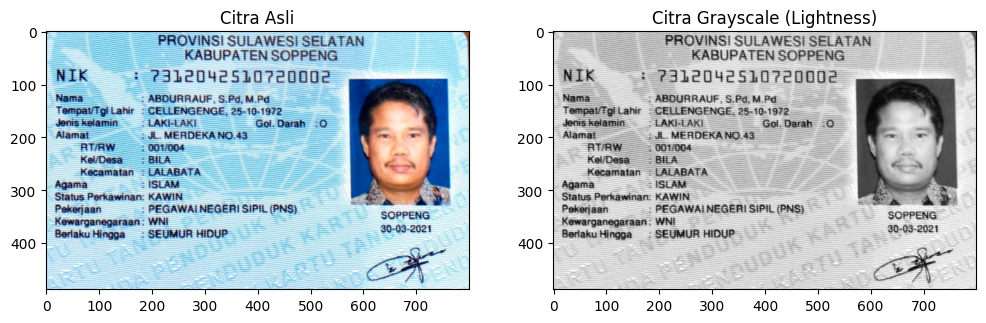

In [ ]:
print('Transformasi Grayscale - Metode Lightness')
print('---------------------------------')

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

grayscale_image = (np.max(original, axis=2))/2 + (np.min(original, axis=2)) / 2

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Lightness)')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')
plt.show()



Penjelasan : Transformasi Grayscale menggunakan metode Lightness yang didapatkan dari nilai maksimal RGB dijumlahkan dengan nilai minimal RGB lalu dibagi 2

**C.Luminance**

Transformasi Grayscale - Metode Luminance
---------------------------------


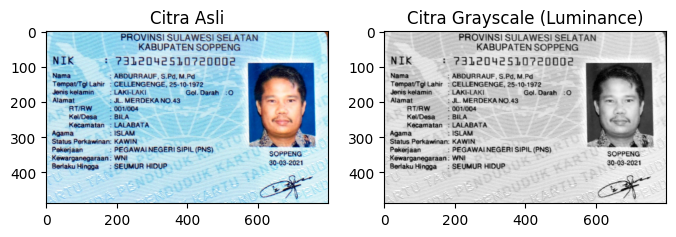

In [ ]:
print('Transformasi Grayscale - Metode Luminance')
print('---------------------------------')

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

luminance_image = (0.21 * original[:, :, 2] + 0.72 * original[:, :, 1] + 0.07 * original[:, :, 0]).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Luminance)')
plt.imshow(luminance_image, cmap='gray')
plt.axis('on')
plt.show()

Penjelasan : Transformasi Grayscale menggunakan metode Luminance yang didapatkan dari penjumlahan nilai 0.21 dikalikan nilai Red lalu dijumlahkan 0.72 dikalikan nilai Green dan dijumlahkan lagi dari haril penjumlahan 0.07 dikali nilai blue

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale


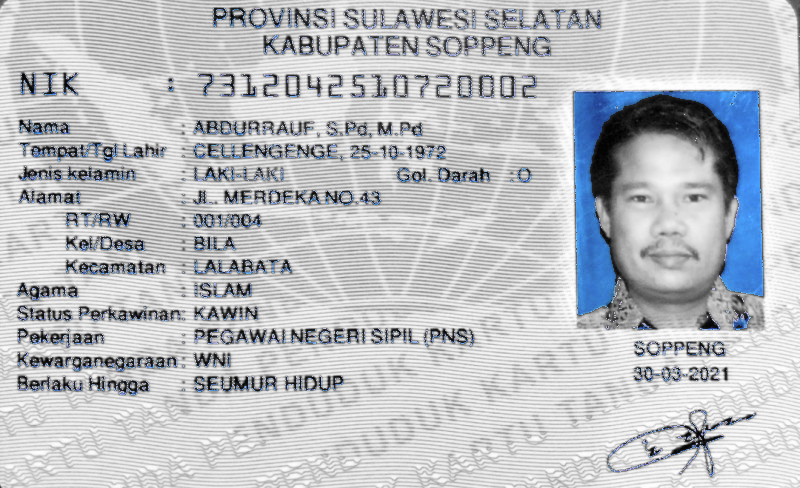

In [13]:
print ('Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale')
print ('=============================================================================')

ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Define the range of blue color (adjust these values as needed)
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])

# Create a mask for blue pixels
mask_blue = cv.inRange(ktp, lower_blue, upper_blue)

# Convert the blue pixels to grayscale
blue_pixels = cv.bitwise_and(ktp, ktp, mask=mask_blue)

# Convert the rest of the image to grayscale
gray_mask = cv.cvtColor(cv.bitwise_not(mask_blue), cv.COLOR_GRAY2BGR)
gray_image = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Combine the blue pixels and grayscale regions
result_image = cv.add(gray_image, blue_pixels)
cv2_imshow(result_image)
